In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, cross_validation, grid_search
from scipy.stats import expon

# What are Support Vector Machines?

Support Vectors are separating hyperplanes. 

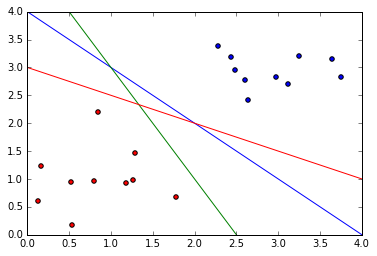

In [7]:
np.random.seed(111)
blue = .5*np.random.randn(10,2)+3
red = .5*np.random.randn(10,2)+1

x = np.linspace(0, 4, 100)
plt.scatter(blue[:,0], blue[:,1], c='b')
plt.scatter(red[:,0], red[:,1], c='r')
plt.plot(x, -x+4)
plt.plot(x, -2*x+5)
plt.plot(x, -.5*x+3)
plt.ylim(0,4)
plt.xlim(0,4)
plt.show()

Which of these seperating hyperplanes is the best? One way that you could decide is by choosing the hyperplane that maximizes the "margin" between the line and the two sets of data. 

Also, we hardly ever have separable data, so we will have to make a penalty for points that are on the wrong side of the hyperplane.

And what about data that looks like this

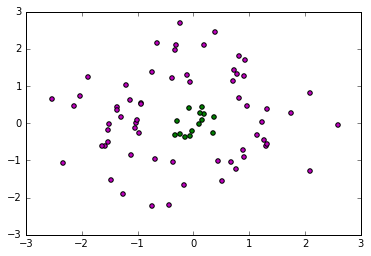

In [8]:
data = np.random.randn(100,2)
green = data[np.linalg.norm(data,axis=1)<0.5]
purp = data[np.linalg.norm(data,axis=1)>1.0]

x = np.linspace(0, 4, 100)
plt.scatter(green[:,0], green[:,1], c='g')
plt.scatter(purp[:,0], purp[:,1], c='m')
plt.show()

Because of some really cool mathemagic we can use what are called kernels to transform our data to a higher dimensional space where the data can be more easily separated by a hyperplane. 

If you want the details and to learn some really cool math behind SVM I would recommend Andrew Ng's notes:  
http://cs229.stanford.edu/notes/cs229-notes3.pdf

# Some simple SVM code

We will know use the well known iris dataset to look at how to implement a support vector classifier.

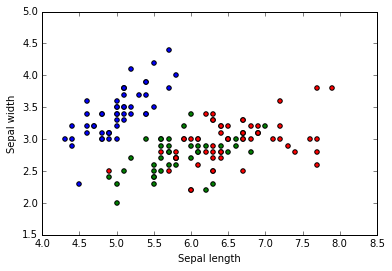

In [9]:
iris = datasets.load_iris()

X, y = iris.data[:,:2], iris.target

plt.scatter(X[:,0][y==0], X[:,1][y==0],c='b')
plt.scatter(X[:,0][y==1], X[:,1][y==1],c='g')
plt.scatter(X[:,0][y==2], X[:,1][y==2],c='r')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

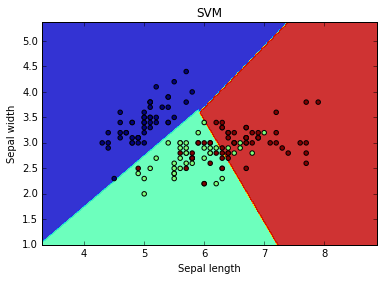

In [10]:
C = 10.
lin_model = svm.SVC(kernel='linear', C=C)
lin_model.fit(X, y)

h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = lin_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM')
plt.show()

But, how do we know if $C=10$ is a good choice? It looks good, at least.

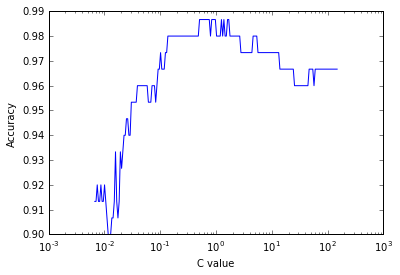

In [11]:
C_grid = np.exp(np.linspace(-5,5,200))
score_list = []
for C in C_grid:
    lin_model = svm.SVC(kernel='linear', C=C)
    scores = cross_validation.cross_val_score(
        lin_model, iris.data, iris.target, cv=5)
    score_list.append(scores.mean())
plt.plot(C_grid, score_list)
plt.ylabel('Accuracy')
plt.xlabel('C value')
plt.xscale('log')
plt.show()

What if we use different kernels?

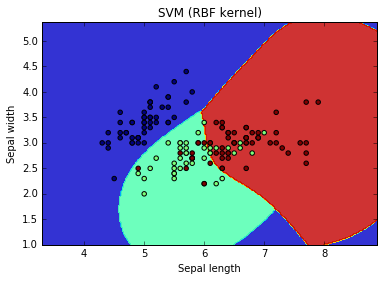

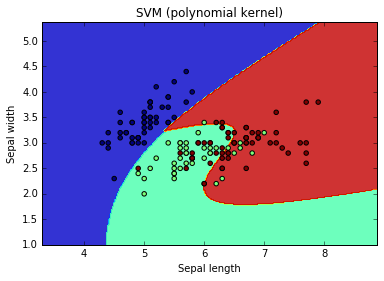

In [12]:
C = 10.0
rbf_model = svm.SVC(kernel='rbf', gamma=0.7, C=C)
rbf_model.fit(X, y)
poly_model = svm.SVC(kernel='poly', degree=5, C=C)
poly_model.fit(X, y)

Z = rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
plt.title('SVM (RBF kernel)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Z = poly_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
plt.title('SVM (polynomial kernel)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

We could find the "best" value of $C$ in a similar way as before. However, different kernels have different hyperparameters that must be chosen. For instance, the RBF kernel requires we choose the parameter gamma and the polynomial kernel requires us to choose the degree of our polynomial.

# Grid Search Cross Validation

Scikit Learn has a very easy built in way to search for best values for hyperparameters. We will now use a different well known dataset that gives pictures of handwritten digits.

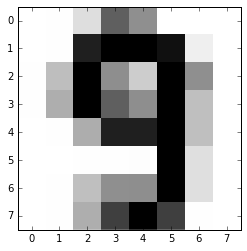

In [13]:
digits = datasets.load_digits()

plt.imshow(digits.images[-2], cmap='binary', interpolation='None')
plt.show()

In [14]:
model = svm.SVC(kernel='linear', C=1.0)

scores = cross_validation.cross_val_score(
    model, digits.data, digits.target, cv=3)

print scores.mean(), scores.std()

0.943799727629 0.0102870049227


In [15]:
model = svm.SVC(gamma=0.001, C=100., kernel='linear')

param_grid = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'degree': [2,3,4], 'kernel': ['poly']}
 ]

model = grid_search.GridSearchCV(svm.SVC(C=1),
                                 param_grid, cv=3, n_jobs=-1)

model.fit(digits.data, digits.target)

print model.best_params_

{'kernel': 'rbf', 'C': 10, 'gamma': 0.001}


In [16]:
scores = cross_validation.cross_val_score(
    model, digits.data, digits.target, cv=3)

print scores.mean(), scores.std()

0.976076357402 0.00412642878782


Another useful scikit learn feature is the randomized grid search.

In [17]:
np.random.seed(777)
param_grid = {'C': expon(scale=10), 'gamma': expon(scale=.001), 'kernel': ['rbf']}

model = grid_search.RandomizedSearchCV(svm.SVC(C=1),
    param_grid, n_iter=20, cv=3, n_jobs=-1)

model.fit(digits.data, digits.target)

print model.best_params_

{'kernel': 'rbf', 'C': 44.98663698754575, 'gamma': 0.0009847655399802568}


In [18]:
scores = cross_validation.cross_val_score(
    model, digits.data, digits.target, cv=3)

print scores.mean(), scores.std()

0.974406880403 0.00412437819368
